In [ ]:
import sys

In [ ]:
!git clone https://github.com/aviadar/covid19 proj

Cloning into 'proj'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 116 (delta 70), reused 82 (delta 36), pack-reused 0
Receiving objects: 100% (116/116), 122.01 KiB | 10.17 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
sys.path.insert(0,'/content/proj')

from utilities.sentence_utility import SentenceUtil

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AdvancedML/HW3/covid_df.csv')

In [ ]:
df

,Unnamed: 0,title,cord_uid,abstract,body
0,0,Blockchain-based governance models for COVID-1...,ppfxi5id,This paper analyses the requirements of a bloc...,"Within the existing literature, papers both ad..."
1,1,On intelligent agent-based simulation of COVID...,uyf9ds7s,COVID-19 has impacted all areas of human activ...,"Over the past decades, significant changes hav..."
2,2,Concern with COVID-19 pandemic threat and atti...,d0s0f0t1,Tightening social norms is thought to be adapt...,Tightening social norms is thought to be adapt...
3,3,An antifragile strategy for Rome post-Covid mo...,ct7nc16b,We are aware that we will have to live with CO...,"Since exactly one year, COVID has changed our ..."
4,4,COVID-19 Time Series Forecasting – Twenty Days...,bs206r15,"The new Coronavirus, responsible for the COVID...",One of the most issues addressed in 2020 and 2...
...,...,...,...,...,...
19995,19995,Patient and Provider Experience With Cystic Fi...,l1y1ezfo,In response to the novel coronavirus (COVID-19...,"On March 11, 2020 the novel coronavirus diseas..."
19996,19996,Association between voriconazole exposure and ...,lccgk110,Therapeutic drug monitoring (TDM) is essential...,Therapeutic drug monitoring (TDM) is essential...
19997,19997,Network Pharmacology-Based Analysis of Pogoste...,8ehcnyp5,Nonalcoholic fatty liver disease (NAFLD) is th...,Nonalcoholic fatty liver disease (NAFLD) is a ...
19998,19998,A Novel Approach to the Viability Determinatio...,htzqgwp6,Mycobacterium avium subsp. paratuberculosis (M...,Mycobacterium avium subsp. paratuberculosis (M...


In [ ]:
sentence_util = SentenceUtil(df.abstract)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


100%|██████████| 19999/19999 [09:14<00:00, 36.07it/s]


In [ ]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sentence_util.embedding)
    Sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method For Optimal k')

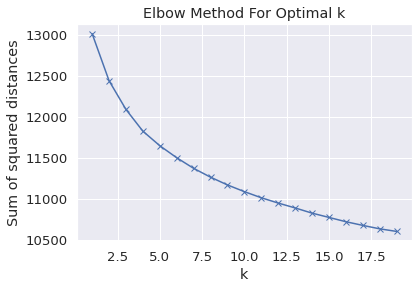

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

In [ ]:
sentence_util.cluster_sentences(k_clusters=10)

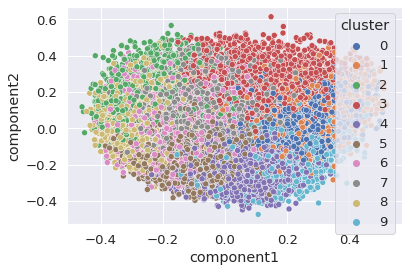

In [ ]:
sentence_util.plot_clusters()

In [ ]:
sentence_util.plot_similarity()